In [36]:
import pandas as pd
import numpy as np


fruits_data=pd.read_csv('Raw_data1.csv')
fruits_data

,days,fruits,fruits quantity,sold quantity,fruit cost,total cost,margin,selling price,total income,total profit
0,weekday,mango,500,350,55,27500,65,120,42000,22750
1,weekday,banana,100,70,20,2000,20,40,2800,1400
2,weekday,grapes,400,300,65,26000,55,120,36000,16500
3,weekday,apple,40,15,140,5600,80,220,3300,1200
4,weekday,orange,200,100,45,9000,35,80,8000,3500
...,...,...,...,...,...,...,...,...,...,...
145,holiday,mango,450,440,55,24750,65,120,52800,28600
146,holiday,banana,150,120,20,3000,20,40,4800,2400
147,holiday,grapes,500,480,65,32500,55,120,57600,26400
148,holiday,apple,35,26,140,4900,80,220,5720,2080


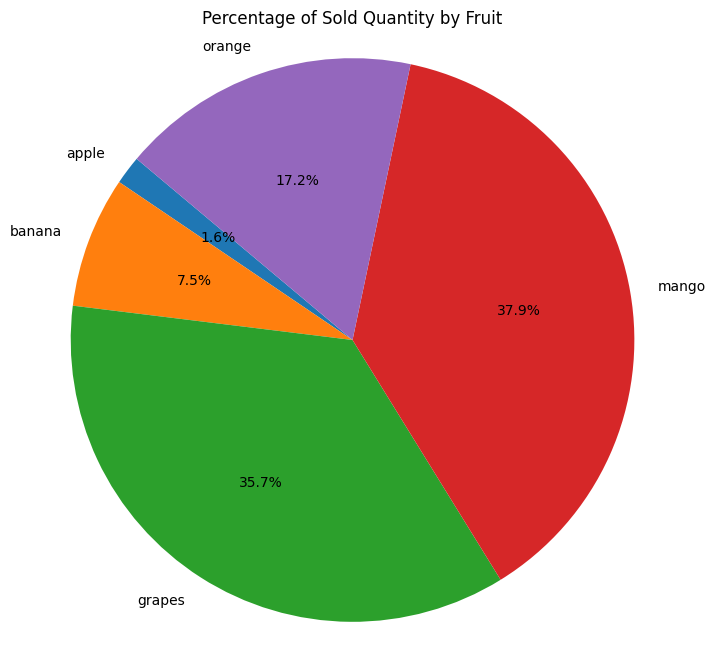

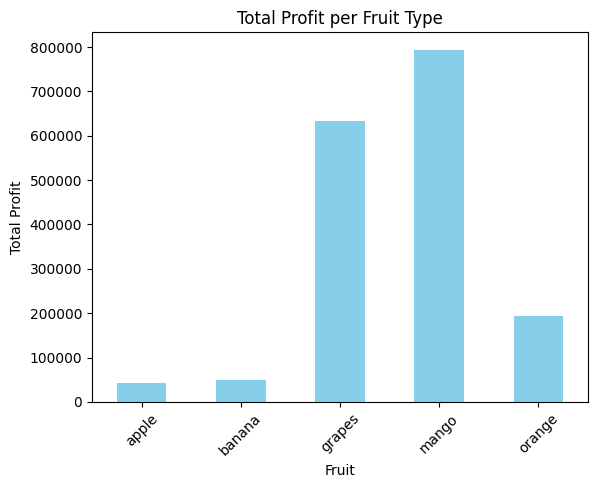

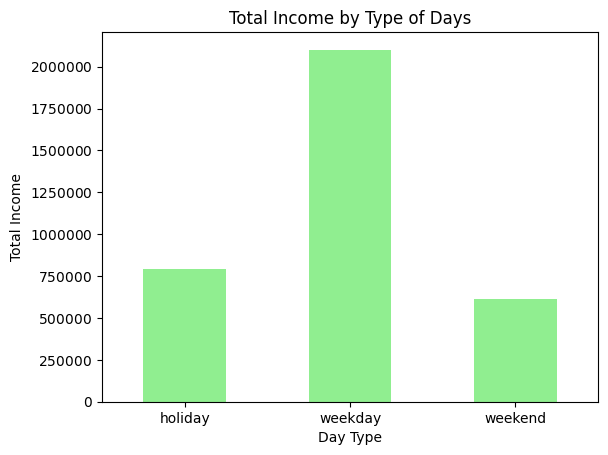

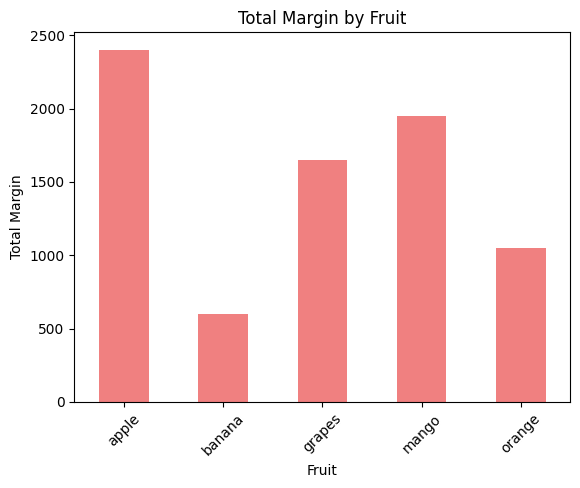

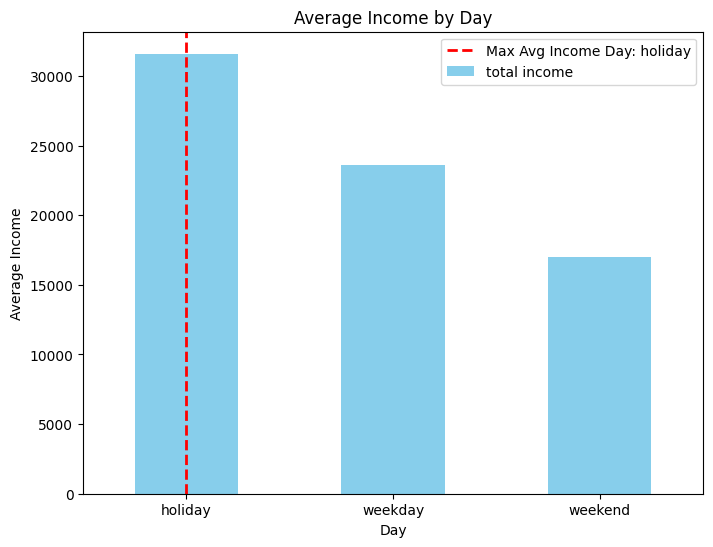

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# Load the dataset
fruits_data = pd.read_csv('Raw_data1.csv')
# Load the dataset with appropriate data types
fruits_data = pd.read_csv('Raw_data1.csv', dtype={'fruits': str, 'sold quantity': int})

# Group by fruit and sum the sold quantity
fruit_sold_quantity = fruits_data.groupby('fruits')['sold quantity'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(fruit_sold_quantity, labels=fruit_sold_quantity.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sold Quantity by Fruit')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
# 1. Total profit per fruit type
total_profit_per_fruit = fruits_data.groupby('fruits')['total profit'].sum()
total_profit_per_fruit.plot(kind='bar', color='skyblue')
plt.title('Total Profit per Fruit Type')
plt.xlabel('Fruit')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

# 2. Total income by type of days
total_income_by_days = fruits_data.groupby('days')['total income'].sum()
total_income_by_days.plot(kind='bar', color='lightgreen')
plt.title('Total Income by Type of Days')
plt.xlabel('Day Type')
plt.ylabel('Total Income')
plt.xticks(rotation=0)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# 3. Total margin by fruits
total_margin_by_fruit = fruits_data.groupby('fruits')['margin'].sum()
total_margin_by_fruit.plot(kind='bar', color='lightcoral')
plt.title('Total Margin by Fruit')
plt.xlabel('Fruit')
plt.ylabel('Total Margin')
plt.xticks(rotation=45)
plt.show()

# Plotting the average income for each day
avg_income_by_day = fruits_data.groupby('days')['total income'].mean()

# Find the day with the maximum average income
max_avg_income_day = avg_income_by_day.idxmax()
plt.figure(figsize=(8, 6))
avg_income_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Income by Day')
plt.xlabel('Day')
plt.ylabel('Average Income')
plt.xticks(rotation=0)

# Highlight the day with the maximum average income
plt.axvline(x=max_avg_income_day, color='red', linestyle='--', linewidth=2, label=f'Max Avg Income Day: {max_avg_income_day}')
plt.legend()

plt.show()


In [38]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
dfle=fruits_data
dfle.days=lbe.fit_transform(dfle.days)
dfle

,days,fruits,fruits quantity,sold quantity,fruit cost,total cost,margin,selling price,total income,total profit
0,1,mango,500,350,55,27500,65,120,42000,22750
1,1,banana,100,70,20,2000,20,40,2800,1400
2,1,grapes,400,300,65,26000,55,120,36000,16500
3,1,apple,40,15,140,5600,80,220,3300,1200
4,1,orange,200,100,45,9000,35,80,8000,3500
...,...,...,...,...,...,...,...,...,...,...
145,0,mango,450,440,55,24750,65,120,52800,28600
146,0,banana,150,120,20,3000,20,40,4800,2400
147,0,grapes,500,480,65,32500,55,120,57600,26400
148,0,apple,35,26,140,4900,80,220,5720,2080


In [39]:
labels, unique = pd.factorize(dfle['fruits'])
dfle['fruits'] = labels + 1
dfle

,days,fruits,fruits quantity,sold quantity,fruit cost,total cost,margin,selling price,total income,total profit
0,1,1,500,350,55,27500,65,120,42000,22750
1,1,2,100,70,20,2000,20,40,2800,1400
2,1,3,400,300,65,26000,55,120,36000,16500
3,1,4,40,15,140,5600,80,220,3300,1200
4,1,5,200,100,45,9000,35,80,8000,3500
...,...,...,...,...,...,...,...,...,...,...
145,0,1,450,440,55,24750,65,120,52800,28600
146,0,2,150,120,20,3000,20,40,4800,2400
147,0,3,500,480,65,32500,55,120,57600,26400
148,0,4,35,26,140,4900,80,220,5720,2080


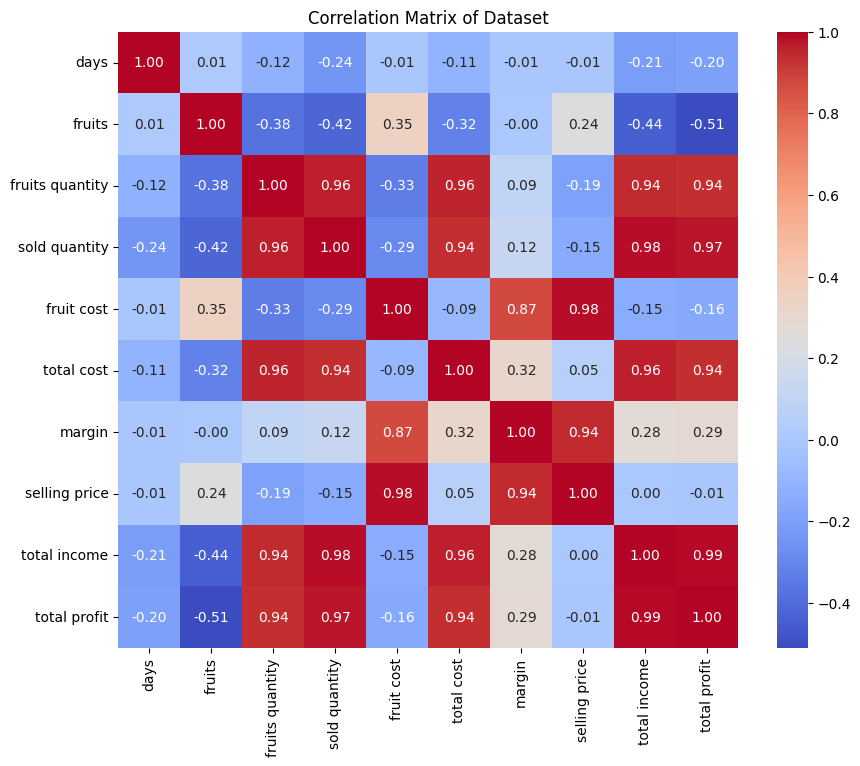

In [40]:
import seaborn as sns
corr_matrix = dfle.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Dataset')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
x=dfle[['days','fruits','fruit cost']]
y=dfle.drop(columns=['days','fruits','fruit cost'],axis=1)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [43]:
test_data=pd.read_csv('data3.csv')
test_data

,days,fruits,fruit cost
0,1,1,185
1,2,1,185
2,0,1,185


In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

lr.predict(test_data)

predicted_values = lr.predict(test_data)
target_variable_names = y.columns.tolist()

result_with_column_names = pd.DataFrame(data=predicted_values, columns=target_variable_names)

print(result_with_column_names)



   fruits quantity  sold quantity    total cost      margin  selling price  \
0       195.678631     181.803716  19910.440324  123.563222     308.563222   
1       168.286943     121.434754  18442.052685  124.066395     309.066395   
2       223.070318     242.172677  21378.827962  123.060050     308.060050   

   total income  total profit  
0  33429.725390  18176.708185  
1  27105.771834  15160.470333  
2  39753.678946  21192.946037  


In [46]:
import pickle
with open('LR.pkl', 'wb') as file:
    pickle.dump(lr, file)